<a href="https://colab.research.google.com/github/apandit42/cs229tings/blob/master/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This function outputs the correlation between weight and the frequency of each card type (bronze, silver gold) for each FIFA title.
```



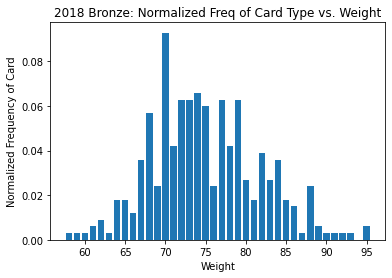

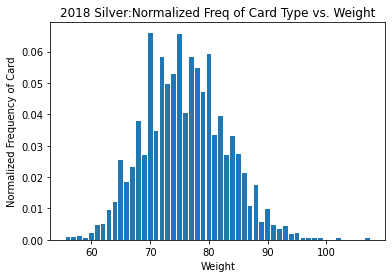

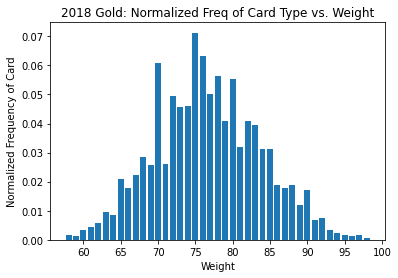

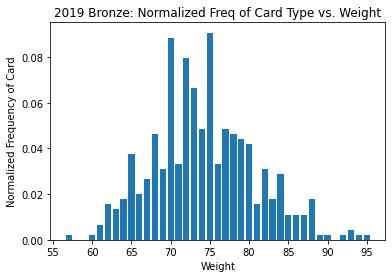

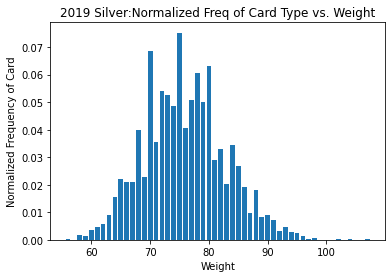

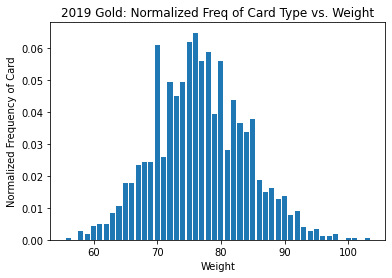

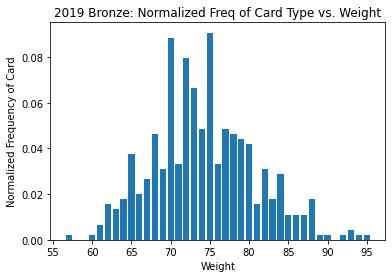

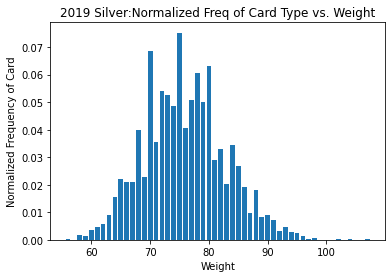

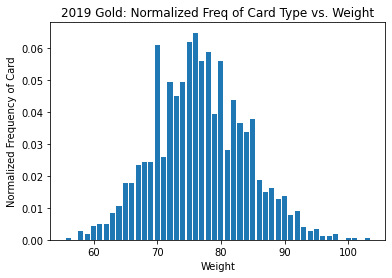

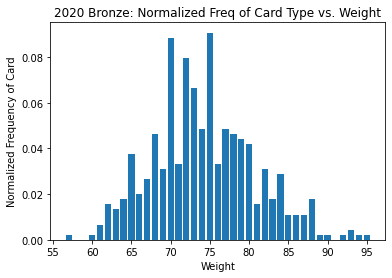

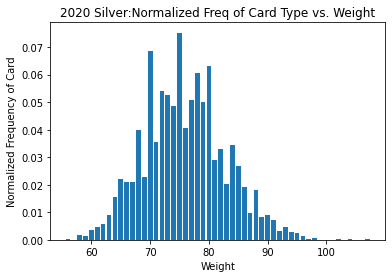

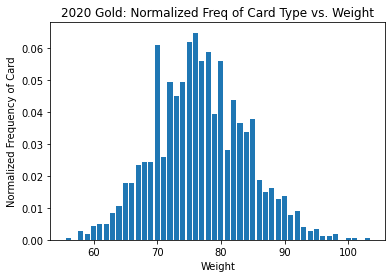

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def mapMaker(dic, x, y, target):
    for i in range(len(x)):
      if y[i] == target and x[i] not in dic:
        dic[x[i]] = 1
      elif y[i] == target: 
        dic[x[i]] += 1
    return dic


years = ["2018", "2019", "2019", "2020"]
for j in range(4):
  db = pd.read_csv('DB/' + years[j] +'_subset.csv')
  card_types = db["fifa_overall_category"]
  weights = db["weight"]

  db.loc[(card_types == "gold"), "fifa_overall_category"] = 3
  db.loc[(card_types == "silver"), "fifa_overall_category"] = 2
  db.loc[(card_types == "bronze"), "fifa_overall_category"] = 1

  dicts = []
  for i in range(1, 4):
    dicts.append(mapMaker({}, weights, card_types, i))
  titles = [" Bronze: ", " Silver:", " Gold: "]
  i = 0
  for dictionary in dicts:
    x =  []
    y = []
    for key in dictionary:
      if key == 0:
        continue
      x.append(key)
      normalizedFreq = dictionary[key] / sum(dictionary.values())
      y.append(normalizedFreq)
    plt.bar(x, y)
    plt.title(years[j] + titles[i] + "Normalized Freq of Card Type vs. Weight")
    plt.xlabel("Weight")
    plt.ylabel("Normalized Frequency of Card")
    plt.show()
    i += 1

Plots normalized frequency versus age for all fifa titles.

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def mapMaker(dic, x, y, target):
    for i in range(len(x)):
      if y[i] == target and x[i] not in dic:
        dic[x[i]] = 1
      elif y[i] == target: 
        dic[x[i]] += 1
    return dic


years = ["2018", "2019", "2019", "2020"]
for j in range(4):
  db = pd.read_csv('DB/' + years[j] +'_subset.csv')
  card_types = db["fifa_overall_category"]
  ages = db["age"]

  db.loc[(card_types == "gold"), "fifa_overall_category"] = 3
  db.loc[(card_types == "silver"), "fifa_overall_category"] = 2
  db.loc[(card_types == "bronze"), "fifa_overall_category"] = 1

  dicts = []
  for i in range(1, 4):
    dicts.append(mapMaker({}, ages, card_types, i))
  titles = [" Bronze: ", " Silver:", " Gold: "]
  i = 0
  for dictionary in dicts:
    x =  []
    y = []
    for key in dictionary:
      if key == 0:
        continue
      x.append(key)
      normalizedFreq = dictionary[key] / sum(dictionary.values())
      y.append(normalizedFreq)
    plt.bar(x, y)
    plt.title(years[j] + titles[i] + "Normalized Freq of Card Type vs. Age")
    plt.xlabel("Ages")
    plt.ylabel("Normalized Frequency of Card")
    plt.show()
    i += 1

,Unnamed: 0,id,fifa_year,ws_player_id,age,height,weight,appearances,subs_on,min_played,goal_per_game,assists_total_per_game,yellow_cards_per_game,red_cards_per_game,shots_per_game,aerials_won_per_game,man_of_match_per_game,pass_success,tackles_per_game,interceptions_per_game,fouls_per_game,offsides_won_per_game,clearance_per_game,was_dribbled_per_game,outfielder_blocked_per_game,goal_own_per_game,key_pass_per_game,dribbles_won_per_game,fouls_given_per_game,offsides_given_per_game,dispossessed_per_game,turnovers_per_game,total_passes_per_game,accurate_crosses_per_game,accurate_long_passes_per_game,accurate_through_ball_per_game,fifa_pace,fifa_acceleration,fifa_sprint_speed,fifa_shooting,...,fifa_defense,fifa_marking,fifa_interceptions,fifa_heading_accuracy,fifa_standing_tackle,fifa_sliding_tackle,fifa_physical,fifa_jumping,fifa_stamina,fifa_strength,fifa_aggression,fifa_overall_score,he_CB,he_CDM,he_CF,he_CM,he_GK,he_LB,he_LF,he_LM,he_LW,he_LWB,he_RB,he_RF,he_RM,he_RW,he_RWB,he_ST,he_Bundesliga,he_Champions League,he_Eredivisie,he_LaLiga,he_Liga NOS,he_Ligue 1,he_Major League Soccer,he_Premier League,he_Serie A,he_Super Lig,he_Super league,he_Superliga
count,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.0,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,...,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.0,1083.000000,1083.000000,1083.00000,1083.000000,1083.0,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.0,1083.000000,1083.00000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000
mean,8109.147738,8110.147738,2019.821791,259817.907664,26.253924,180.570637,74.319483,15.054478,5.387812,889.037858,0.042125,0.037715,0.124064,0.008324,0.551383,0.836022,0.010034,75.840690,1.010929,0.711827,0.867041,0.115461,1.233996,0.521213,0.171449,0.0,0.414733,0.404005,0.642091,0.080100,0.541946,0.822485,20.714442,0.199982,1.362134,0.012026,65.778393,64.676824,65.179132,48.484765,...,48.651893,47.697138,45.548476,52.705448,47.979686,46.101570,62.208680,63.755309,62.232687,63.517082,55.457987,61.260388,0.158818,0.084949,0.001847,0.140351,0.037858,0.094183,0.0,0.053555,0.029548,0.00554,0.094183,0.0,0.086796,0.027701,0.000923,0.143121,0.009234,0.0,0.071099,0.00554,0.018467,0.024931,0.225300,0.006464,0.033241,0.060942,0.390582,0.141274
std,5031.051422,5031.051422,1.056013,115362.891006,4.417991,5.933656,6.342756,6.739528,4.378269,636.483382,0.069322,0.059025,0.110892,0.025456,0.457190,0.759492,0.030413,8.829892,0.679337,0.630159,0.505188,0.206007,1.347112,0.381803,0.220334,0.0,0.343146,0.398820,0.426665,0.138856,0.433508,0.610702,11.165731,0.268027,1.476362,0.034749,9.493592,11.481275,11.233912,11.837333,...,13.789538,16.129979,17.259737,11.733054,17.468894,17.106247,7.899369,10.296714,11.237701,11.608224,13.138282,3.157096,0.365675,0.278935,0.042954,0.347511,0.190940,0.292218,0.0,0.225241,0.169414,0.07426,0.292218,0.0,0.281666,0.164190,0.030387,0.350358,0.095691,0.0,0.257109,0.07426,0.134696,0.155986,0.417973,0.080173,0.179348,0.239334,0.488106,0.348465
min,680.000000,681.000000,2018.000000,4740.000000,17.000000,160.000000,57.000000,6.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.338658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.727273,0.000000,0.000000,0.000000,33.000000,15.000000,18.000000,19.000000,...,17.000000,7.000000,1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def mapMaker(dic, x, y, target):
    for i in range(len(x)):
      if y[i] == target and x[i] not in dic:
        dic[x[i]] = 1
      elif y[i] == target: 
        dic[x[i]] += 1
    return dic


years = ["2018", "2019", "2019", "2020"]
for j in range(4):
  db = pd.read_csv('DB/' + years[j] +'_subset.csv')
  card_types = db["fifa_overall_category"]
  heights = db["height"]

  db.loc[(card_types == "gold"), "fifa_overall_category"] = 3
  db.loc[(card_types == "silver"), "fifa_overall_category"] = 2
  db.loc[(card_types == "bronze"), "fifa_overall_category"] = 1

  dicts = []
  for i in range(1, 4):
    dicts.append(mapMaker({}, heights, card_types, i))
  titles = [" Bronze: ", " Silver:", " Gold: "]
  i = 0
  for dictionary in dicts:
    x =  []
    y = []
    for key in dictionary:
      if key == 0:
        continue
      x.append(key)
      normalizedFreq = dictionary[key] / sum(dictionary.values())
      y.append(normalizedFreq)
    plt.bar(x, y)
    plt.title(years[j] + titles[i] + "Normalized Freq of Card Type vs. Height")
    plt.xlabel("Height")
    plt.ylabel("Normalized Frequency of Card")
    plt.show()
    i += 1

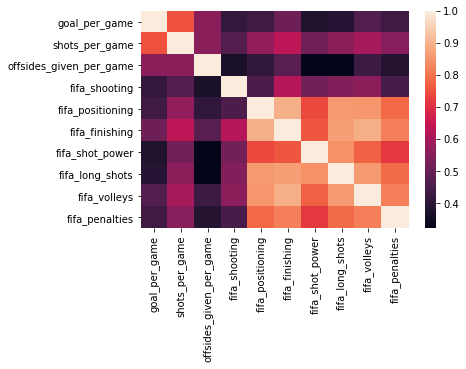

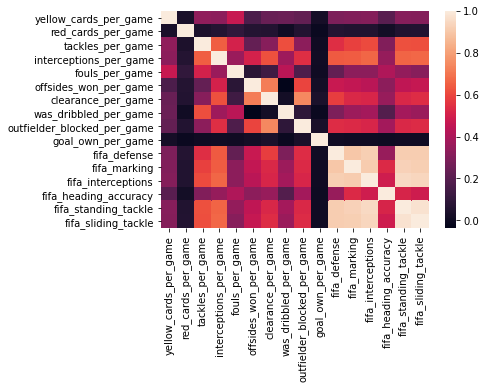

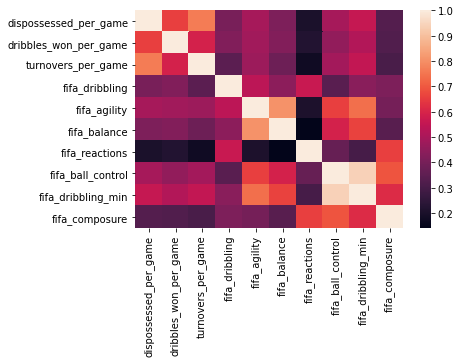

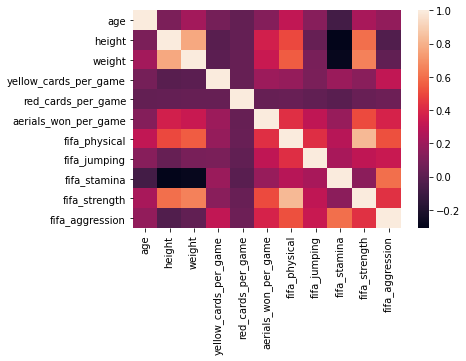

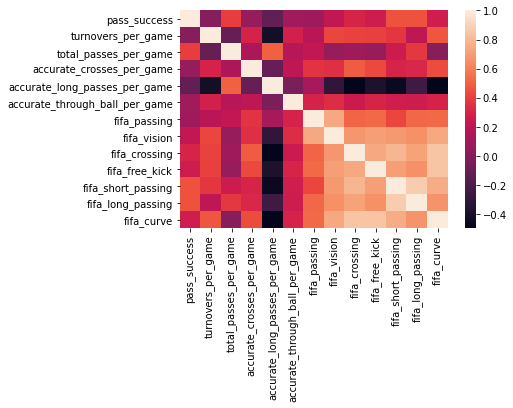

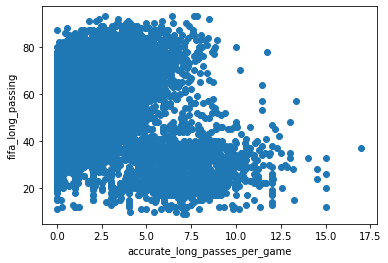

0    32
1    33
2    28
3    27
4    30
Name: age, dtype: int64
0    3
1    3
2    3
3    3
4    3
Name: fifa_overall_category, dtype: object


AttributeError: ignored

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


db = pd.read_csv('DB/fifa_final_he.csv') 
attackDB = pd.concat([db.loc[:, ["goal_per_game", "shots_per_game", "offsides_given_per_game"]], db.loc[:, "fifa_shooting":"fifa_penalties"]], axis=1)
corrMatrix = attackDB.corr()
corrMatrix.to_csv("DB/corrMatrix.csv")
plot1 = plt.figure()
sn.heatmap(corrMatrix, annot=False)
plt.savefig("corrMat_shooting.png")

plot2 = plt.figure()
db1 = pd.concat([db.loc[:, ["yellow_cards_per_game", "red_cards_per_game"]], db.loc[:, "tackles_per_game":"goal_own_per_game"]], axis=1)
defenseDB = pd.concat([db1, db.loc[:, "fifa_defense":"fifa_sliding_tackle"]], axis=1)
corrMatrixDef = defenseDB.corr()
sn.heatmap(corrMatrixDef, annot=False)
plt.savefig("corrMat_defense.png")

plot3 = plt.figure()
dribblingDB = pd.concat([db.loc[:, ["dispossessed_per_game","dribbles_won_per_game", "turnovers_per_game"]], db.loc[:, "fifa_dribbling":"fifa_composure"]], axis=1)
corrMatrixDri = dribblingDB.corr()
sn.heatmap(corrMatrixDri, annot=False)
plt.savefig("corrMat_dribbling.png")

plot4 = plt.figure()
physDB = pd.concat([db.loc[:, ["age", "height", "weight", "yellow_cards_per_game", "red_cards_per_game", "aerials_won_per_game"]], db.loc[:, "fifa_physical":"fifa_aggression"]], axis=1)
corrMatrixPhys = physDB.corr()
sn.heatmap(corrMatrixPhys, annot=False)
plt.savefig("corrMat_physical.png")

plot5 = plt.figure()
db1 = pd.concat([db.loc[:, "pass_success"], db.loc[:, "turnovers_per_game":"accurate_through_ball_per_game"]], axis=1)
passingDB = pd.concat([db1, db.loc[:, "fifa_passing":"fifa_curve"]], axis=1)
corrMatrixPas = passingDB.corr()
sn.heatmap(corrMatrixPas, annot=False)
plt.savefig("corrMat_passing.png")

plot6 = plt.figure()
plt.scatter(db.loc[:,"accurate_long_passes_per_game"], db.loc[:,"fifa_long_passing"])
plt.xlabel("accurate_long_passes_per_game")
plt.ylabel("fifa_long_passing")
plt.show()

db.loc[(db.fifa_overall_category == "gold"), "fifa_overall_category"] = 3
db.loc[(db.fifa_overall_category == "silver"), "fifa_overall_category"] = 2
db.loc[(db.fifa_overall_category == "bronze"), "fifa_overall_category"] = 1
features = db.loc[:, "age":"accurate_through_ball_per_game"]
labels = db.fifa_overall_category
cov = []
for i in range(len(features)):
  feature = features.iloc[:,i]
  print(feature.head())
  print(labels.head())
  cov.append(np.cov(feature, labels))
max_index = numbers.index(max(cov))
print(features[:,max_index])